### Sentiment Analysis Related To The Increasing Amount of Indonesian VAT (PPN) to 12%.

In [ ]:
# %pip install textblob
# %pip install googletrans==3.1.0a0
#%pip install scikit-learn
#%pip install wordcloud
#%pip install seaborn
#%pip install matplotlib
#%pip install nltk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#from googletrans import Translator

#### Outline

1. data labeling
2. data splitting
3. eda
4. data preprocessing
5. fitting (training data)
6. testing
7. evaluation

#### 1. Business Understanding

Indonesian Govt wants to know the impact of the increasing amount of VAT from the headlines of online news outlets in Indonesia. The govt contacted a company (PT AI Bahagia) to classify the responds whether it is good or not.

#### 2. Objective Metrics

As a data analyst + scientist in the company, you are being tasked to create sentiment analysis from online news outlets in Indonesia.

#### 3. Dataset Preparation

The dataset was created by scraping Indonesian online news outlets.

(check scraper.ipynb)

In [4]:
df = pd.read_csv('headlines_ppn_12percent.csv', sep=';')
df

,no,url,title,platform
0,0,https://finance.detik.com/berita-ekonomi-bisni...,Jubir Luhut Berikan Penjelasan soal PPN Naik J...,detik.com
1,1,https://finance.detik.com/detiktv/d-7659190/vi...,Video Luhut Sebut Pajak 12% Diundur,detik.com
2,2,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Sebut PPN Naik Jadi 12% Bakal Diundur!,detik.com
3,3,https://finance.detik.com/berita-ekonomi-bisni...,Pengusaha Dipanggil Kemenkeu Bahas PPN Naik Ja...,detik.com
4,4,https://finance.detik.com/ekonomi-bisnis/d-765...,Airlangga & Sri Mulyani Kompak Ogah Respons Pe...,detik.com
...,...,...,...,...
409,409,https://www.liputan6.com/bisnis/read/5673215/p...,"PPN Naik jadi 12%, Siap-Siap Harga Barang Maki...",liputan6.com
410,410,https://www.liputan6.com/bisnis/read/5659024/p...,Pengusaha Mal Tolak PPN 12%: Gerus Daya Beli M...,liputan6.com
411,411,https://www.liputan6.com/bisnis/read/5654102/p...,"PPN Bakal Naik Tahun Depan, Siap-Siap!",liputan6.com
412,412,https://www.liputan6.com/bisnis/read/5639188/m...,"Minta Rencana PPN 12% di 2025 ditunda, Faisal ...",liputan6.com


#### 4. Data Labeling

- translate the indonesian title into english
- give polarity scores for each title using textblob (label the data)

**teks indo -> translate ke Inggris -> make lib buat dapetin polarity score nya -> kategoriin sesuai ama score nya**

Translate the title into EN to get polarity scores

https://medium.com/@apappascs/how-to-perform-sentiment-analysis-in-python-using-textblob-dc64f262e9ea

https://stackoverflow.com/questions/67698072/translate-dataframe-columns-in-python-using-google-trans-new-library

In [5]:
translator = Translator()

# comment to make the runtime faster
# df['title_en'] = df['title'].apply(lambda x: translator.translate(str(x), src='id', dest='en').text)

In [6]:
df

,no,url,title,platform,title_en
0,0,https://finance.detik.com/berita-ekonomi-bisni...,Jubir Luhut Berikan Penjelasan soal PPN Naik J...,detik.com,Luhut's spokesperson provides an explanation r...
1,1,https://finance.detik.com/detiktv/d-7659190/vi...,Video Luhut Sebut Pajak 12% Diundur,detik.com,Luhut's video says the 12% tax has been postponed
2,2,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Sebut PPN Naik Jadi 12% Bakal Diundur!,detik.com,Luhut Says VAT Increase to 12% Will Be Postponed!
3,3,https://finance.detik.com/berita-ekonomi-bisni...,Pengusaha Dipanggil Kemenkeu Bahas PPN Naik Ja...,detik.com,Entrepreneurs Summoned by Ministry of Finance ...
4,4,https://finance.detik.com/ekonomi-bisnis/d-765...,Airlangga & Sri Mulyani Kompak Ogah Respons Pe...,detik.com,Airlangga and Sri Mulyani Compact Refuse to Re...
...,...,...,...,...,...
409,409,https://www.liputan6.com/bisnis/read/5673215/p...,"PPN Naik jadi 12%, Siap-Siap Harga Barang Maki...",liputan6.com,"VAT Increases to 12%, Get Ready for Prices of ..."
410,410,https://www.liputan6.com/bisnis/read/5659024/p...,Pengusaha Mal Tolak PPN 12%: Gerus Daya Beli M...,liputan6.com,Mall Entrepreneurs Reject 12% VAT: Eroding Peo...
411,411,https://www.liputan6.com/bisnis/read/5654102/p...,"PPN Bakal Naik Tahun Depan, Siap-Siap!",liputan6.com,"VAT Will Increase Next Year, Get Ready!"
412,412,https://www.liputan6.com/bisnis/read/5639188/m...,"Minta Rencana PPN 12% di 2025 ditunda, Faisal ...",liputan6.com,Asking for the 12% VAT plan in 2025 to be post...


Polarity Scores Using TextBlob

In [7]:
from textblob import TextBlob

def text_polarity(text):
    blob = TextBlob(text=text)
    score = blob.sentiment.polarity
    return score

In [8]:
# title_en_str = df['title_en'].astype(str)

df['score'] = df['title_en'].astype(str).apply(text_polarity)
df

,no,url,title,platform,title_en,score
0,0,https://finance.detik.com/berita-ekonomi-bisni...,Jubir Luhut Berikan Penjelasan soal PPN Naik J...,detik.com,Luhut's spokesperson provides an explanation r...,0.000000
1,1,https://finance.detik.com/detiktv/d-7659190/vi...,Video Luhut Sebut Pajak 12% Diundur,detik.com,Luhut's video says the 12% tax has been postponed,0.000000
2,2,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Sebut PPN Naik Jadi 12% Bakal Diundur!,detik.com,Luhut Says VAT Increase to 12% Will Be Postponed!,0.000000
3,3,https://finance.detik.com/berita-ekonomi-bisni...,Pengusaha Dipanggil Kemenkeu Bahas PPN Naik Ja...,detik.com,Entrepreneurs Summoned by Ministry of Finance ...,0.000000
4,4,https://finance.detik.com/ekonomi-bisnis/d-765...,Airlangga & Sri Mulyani Kompak Ogah Respons Pe...,detik.com,Airlangga and Sri Mulyani Compact Refuse to Re...,0.000000
...,...,...,...,...,...,...
409,409,https://www.liputan6.com/bisnis/read/5673215/p...,"PPN Naik jadi 12%, Siap-Siap Harga Barang Maki...",liputan6.com,"VAT Increases to 12%, Get Ready for Prices of ...",0.066667
410,410,https://www.liputan6.com/bisnis/read/5659024/p...,Pengusaha Mal Tolak PPN 12%: Gerus Daya Beli M...,liputan6.com,Mall Entrepreneurs Reject 12% VAT: Eroding Peo...,0.000000
411,411,https://www.liputan6.com/bisnis/read/5654102/p...,"PPN Bakal Naik Tahun Depan, Siap-Siap!",liputan6.com,"VAT Will Increase Next Year, Get Ready!",0.125000
412,412,https://www.liputan6.com/bisnis/read/5639188/m...,"Minta Rencana PPN 12% di 2025 ditunda, Faisal ...",liputan6.com,Asking for the 12% VAT plan in 2025 to be post...,0.000000


In [9]:
#neutral
df[df['score'] == 0].count()

no          205
url         205
title       205
platform    205
title_en    205
score       205
dtype: int64

In [10]:
#negative
df[df['score'] < 0].count()

no          69
url         69
title       69
platform    69
title_en    69
score       69
dtype: int64

In [11]:
#positive
df[df['score'] > 0].count()

no          140
url         140
title       140
platform    140
title_en    140
score       140
dtype: int64

Categorized the polarity score for data labeling

In [12]:
df['positive'] = np.where(df['score'] > 0, 1, 0)
df['neutral'] = np.where(df['score'] == 0, 1, 0)
df['negative'] = np.where(df['score'] < 0, 1, 0)

df

,no,url,title,platform,title_en,score,positive,neutral,negative
0,0,https://finance.detik.com/berita-ekonomi-bisni...,Jubir Luhut Berikan Penjelasan soal PPN Naik J...,detik.com,Luhut's spokesperson provides an explanation r...,0.000000,0,1,0
1,1,https://finance.detik.com/detiktv/d-7659190/vi...,Video Luhut Sebut Pajak 12% Diundur,detik.com,Luhut's video says the 12% tax has been postponed,0.000000,0,1,0
2,2,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Sebut PPN Naik Jadi 12% Bakal Diundur!,detik.com,Luhut Says VAT Increase to 12% Will Be Postponed!,0.000000,0,1,0
3,3,https://finance.detik.com/berita-ekonomi-bisni...,Pengusaha Dipanggil Kemenkeu Bahas PPN Naik Ja...,detik.com,Entrepreneurs Summoned by Ministry of Finance ...,0.000000,0,1,0
4,4,https://finance.detik.com/ekonomi-bisnis/d-765...,Airlangga & Sri Mulyani Kompak Ogah Respons Pe...,detik.com,Airlangga and Sri Mulyani Compact Refuse to Re...,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...
409,409,https://www.liputan6.com/bisnis/read/5673215/p...,"PPN Naik jadi 12%, Siap-Siap Harga Barang Maki...",liputan6.com,"VAT Increases to 12%, Get Ready for Prices of ...",0.066667,1,0,0
410,410,https://www.liputan6.com/bisnis/read/5659024/p...,Pengusaha Mal Tolak PPN 12%: Gerus Daya Beli M...,liputan6.com,Mall Entrepreneurs Reject 12% VAT: Eroding Peo...,0.000000,0,1,0
411,411,https://www.liputan6.com/bisnis/read/5654102/p...,"PPN Bakal Naik Tahun Depan, Siap-Siap!",liputan6.com,"VAT Will Increase Next Year, Get Ready!",0.125000,1,0,0
412,412,https://www.liputan6.com/bisnis/read/5639188/m...,"Minta Rencana PPN 12% di 2025 ditunda, Faisal ...",liputan6.com,Asking for the 12% VAT plan in 2025 to be post...,0.000000,0,1,0


Export the dataframe

In [13]:
# export into csv to make it easier for splitting, EDA, and preprocessing
# export_csv = df.to_csv('news_headlines_final.csv')

#### 5. Data Splitting

Load the CSV

In [2]:
headlines = pd.read_csv(r'data\news_headlines_final.csv')
headlines

,Unnamed: 0,no,url,title,platform,title_en,score,positive,neutral,negative
0,0,0,https://finance.detik.com/berita-ekonomi-bisni...,Jubir Luhut Berikan Penjelasan soal PPN Naik J...,detik.com,Luhut's spokesperson provides an explanation r...,0.000000,0,1,0
1,1,1,https://finance.detik.com/detiktv/d-7659190/vi...,Video Luhut Sebut Pajak 12% Diundur,detik.com,Luhut's video says the 12% tax has been postponed,0.000000,0,1,0
2,2,2,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Sebut PPN Naik Jadi 12% Bakal Diundur!,detik.com,Luhut Says VAT Increase to 12% Will Be Postponed!,0.000000,0,1,0
3,3,3,https://finance.detik.com/berita-ekonomi-bisni...,Pengusaha Dipanggil Kemenkeu Bahas PPN Naik Ja...,detik.com,Entrepreneurs Summoned by Ministry of Finance ...,0.000000,0,1,0
4,4,4,https://finance.detik.com/ekonomi-bisnis/d-765...,Airlangga & Sri Mulyani Kompak Ogah Respons Pe...,detik.com,Airlangga and Sri Mulyani Compact Refuse to Re...,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
409,409,409,https://www.liputan6.com/bisnis/read/5673215/p...,"PPN Naik jadi 12%, Siap-Siap Harga Barang Maki...",liputan6.com,"VAT Increases to 12%, Get Ready for Prices of ...",0.066667,1,0,0
410,410,410,https://www.liputan6.com/bisnis/read/5659024/p...,Pengusaha Mal Tolak PPN 12%: Gerus Daya Beli M...,liputan6.com,Mall Entrepreneurs Reject 12% VAT: Eroding Peo...,0.000000,0,1,0
411,411,411,https://www.liputan6.com/bisnis/read/5654102/p...,"PPN Bakal Naik Tahun Depan, Siap-Siap!",liputan6.com,"VAT Will Increase Next Year, Get Ready!",0.125000,1,0,0
412,412,412,https://www.liputan6.com/bisnis/read/5639188/m...,"Minta Rencana PPN 12% di 2025 ditunda, Faisal ...",liputan6.com,Asking for the 12% VAT plan in 2025 to be post...,0.000000,0,1,0


In [3]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  414 non-null    int64  
 1   no          414 non-null    int64  
 2   url         414 non-null    object 
 3   title       414 non-null    object 
 4   platform    414 non-null    object 
 5   title_en    414 non-null    object 
 6   score       414 non-null    float64
 7   positive    414 non-null    int64  
 8   neutral     414 non-null    int64  
 9   negative    414 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 32.5+ KB


Drop the unnamed and no columns

In [4]:
headlines = headlines.drop(['Unnamed: 0', 'no'], axis=1)
headlines

,url,title,platform,title_en,score,positive,neutral,negative
0,https://finance.detik.com/berita-ekonomi-bisni...,Jubir Luhut Berikan Penjelasan soal PPN Naik J...,detik.com,Luhut's spokesperson provides an explanation r...,0.000000,0,1,0
1,https://finance.detik.com/detiktv/d-7659190/vi...,Video Luhut Sebut Pajak 12% Diundur,detik.com,Luhut's video says the 12% tax has been postponed,0.000000,0,1,0
2,https://finance.detik.com/berita-ekonomi-bisni...,Luhut Sebut PPN Naik Jadi 12% Bakal Diundur!,detik.com,Luhut Says VAT Increase to 12% Will Be Postponed!,0.000000,0,1,0
3,https://finance.detik.com/berita-ekonomi-bisni...,Pengusaha Dipanggil Kemenkeu Bahas PPN Naik Ja...,detik.com,Entrepreneurs Summoned by Ministry of Finance ...,0.000000,0,1,0
4,https://finance.detik.com/ekonomi-bisnis/d-765...,Airlangga & Sri Mulyani Kompak Ogah Respons Pe...,detik.com,Airlangga and Sri Mulyani Compact Refuse to Re...,0.000000,0,1,0
...,...,...,...,...,...,...,...,...
409,https://www.liputan6.com/bisnis/read/5673215/p...,"PPN Naik jadi 12%, Siap-Siap Harga Barang Maki...",liputan6.com,"VAT Increases to 12%, Get Ready for Prices of ...",0.066667,1,0,0
410,https://www.liputan6.com/bisnis/read/5659024/p...,Pengusaha Mal Tolak PPN 12%: Gerus Daya Beli M...,liputan6.com,Mall Entrepreneurs Reject 12% VAT: Eroding Peo...,0.000000,0,1,0
411,https://www.liputan6.com/bisnis/read/5654102/p...,"PPN Bakal Naik Tahun Depan, Siap-Siap!",liputan6.com,"VAT Will Increase Next Year, Get Ready!",0.125000,1,0,0
412,https://www.liputan6.com/bisnis/read/5639188/m...,"Minta Rencana PPN 12% di 2025 ditunda, Faisal ...",liputan6.com,Asking for the 12% VAT plan in 2025 to be post...,0.000000,0,1,0


Split the data into:
- 80% train
- 10% validation
- 10% test

In [5]:
from sklearn.model_selection import train_test_split

#input
X = headlines['title_en']
#output
y = headlines[['positive', 'neutral', 'negative']]

#flatten into one columns
y = y.idxmax(axis=1)

#train, test split
#temp include test and valid
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
#split the temp into test and validation
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

#check the size
print("Train size:", len(X_train))
print("Validation size:", len(X_valid))
print("Test size:", len(X_test))

#sanity check (414 rows)
print(f'Total Size: {len(X_train) + len(X_valid) + len(X_test)}')

Train size: 331
Validation size: 41
Test size: 42
Total Size: 414


#### 6. EDA (Exploratory Data Analysis)

##### a. Checking Data Structure

In [6]:
print(X_train.head())
print('')
print(X_train.info())
print('')
print(X_train.describe())

192    Check Here! Explanation from the Directorate G...
234    VAT becomes 11%, will prices of Samsung, Xiaom...
5      Will VAT be increased to 12%, will the governm...
45     VAT Increases to 12%, Entrepreneurs Could Be B...
245    Get ready! Telkomsel, XL, Indosat, Smartfren S...
Name: title_en, dtype: object

<class 'pandas.core.series.Series'>
Index: 331 entries, 192 to 102
Series name: title_en
Non-Null Count  Dtype 
--------------  ----- 
331 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB
None

count                                                   331
unique                                                  331
top       Revealed! This is the culprit behind expensive...
freq                                                      1
Name: title_en, dtype: object


##### b. Checking for Null and Missing Values

In [7]:
print(f'Null Values: {X_train.isnull().sum()}')
print(f'Missing Values: {(X_train == '').sum()}')

Null Values: 0
Missing Values: 0


##### c. Checking for Duplicated Values

In [8]:
print(f'Duplicated Values: {X_train.duplicated().sum()}')

Duplicated Values: 0


##### d. Words Distribution

https://thecleverprogrammer.com/2022/06/22/count-number-of-words-in-a-column-using-python/

<Axes: xlabel='title_en', ylabel='Count'>

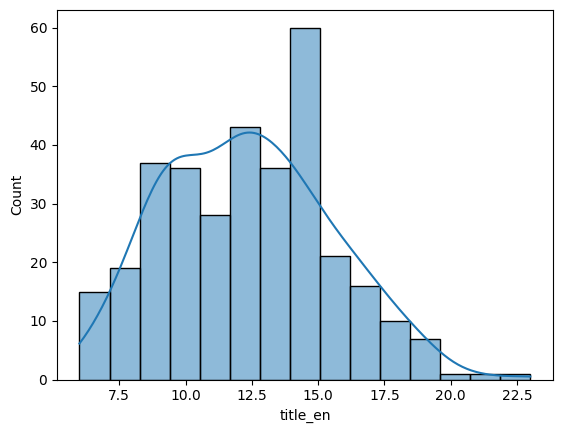

In [9]:
num_words = X_train.apply(lambda n: len(n.split()))

sns.histplot(num_words, kde=True)

Overall distribution are roughly normal (bell-shaped) with:
- Most titles having between 10-17 words
- Approximately 60 titles have around 15 words (which is the highest amount)
- Few titles with very short (< 8 words) or very long (> 20 words) lengths

##### e. Visualization Using Wordcloud

https://www.datacamp.com/tutorial/wordcloud-python

In [10]:
text = " ".join(title_en for title_en in X_train) #combined all the text into one and give a space between strings
print("There are {} words in the combination of all titles.".format(len(text))) 

There are 24099 words in the combination of all titles.


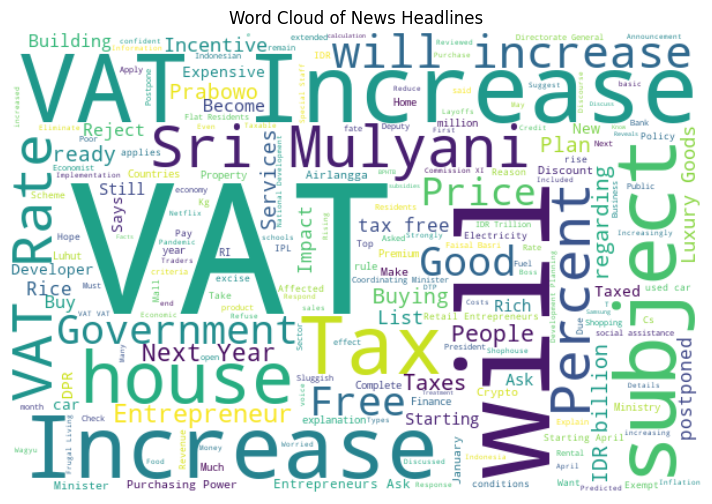

In [25]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text) 

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

##### f. Sentiment Class Distribution

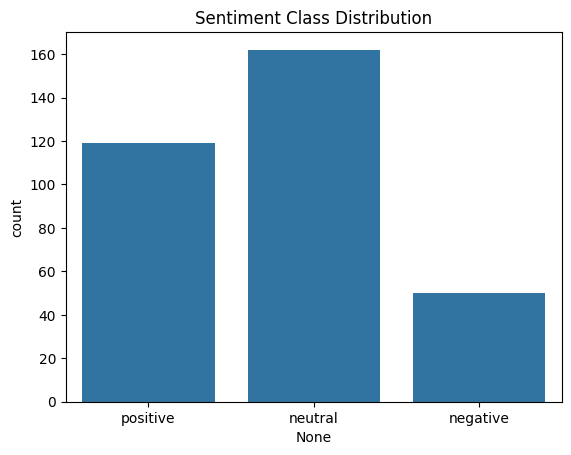

In [12]:
sns.countplot(x = y_train)
plt.title('Sentiment Class Distribution')
plt.show()

#### 7. Data Preprocessing

https://medium.com/@maleeshadesilva21/preprocessing-steps-for-natural-language-processing-nlp-a-beginners-guide-d6d9bf7689c9

Indonesian version:
https://medium.com/mandiri-engineering/text-preprocessing-tahap-awal-dalam-natural-language-processing-nlp-bc5fbb6606a

https://www.geeksforgeeks.org/text-preprocessing-for-nlp-tasks/#why-text-preprocessing-is-important

Accesed on 2nd January 2025

##### a. Case Folding

In [13]:
X_train = X_train.apply(lambda x: x.lower())
X_train

192    check here! explanation from the directorate g...
234    vat becomes 11%, will prices of samsung, xiaom...
5      will vat be increased to 12%, will the governm...
45     vat increases to 12%, entrepreneurs could be b...
245    get ready! telkomsel, xl, indosat, smartfren s...
                             ...                        
71     not included in prabowo's apbn posture, will v...
106    a series of criteria for building your own hou...
270    vat rate will increase to 11% starting april 2022
348    fate hanging over vat increase, msme entrepren...
102    revealed! this is the culprit behind expensive...
Name: title_en, Length: 331, dtype: object

##### b. Removing Characters

https://stackoverflow.com/questions/60684350/replace-multiple-characters-using-re-sub

In [14]:
import re

def remove_chars(text):
    # remove . and ,
    text = re.sub(r'[.,]', '', text)
    return text

X_train = X_train.apply(lambda x: remove_chars(x))
X_train

192    check here! explanation from the directorate g...
234    vat becomes 11% will prices of samsung xiaomi ...
5      will vat be increased to 12% will the governme...
45     vat increases to 12% entrepreneurs could be ba...
245    get ready! telkomsel xl indosat smartfren subj...
                             ...                        
71     not included in prabowo's apbn posture will va...
106    a series of criteria for building your own hou...
270    vat rate will increase to 11% starting april 2022
348    fate hanging over vat increase msme entreprene...
102    revealed! this is the culprit behind expensive...
Name: title_en, Length: 331, dtype: object

##### c. Tokenization

In [17]:
data_path = 'C:/Users/RizkyBagaskara/AppData/Roaming/nltk_data'
print("Punkt exists:", os.path.exists(os.path.join(data_path, 'tokenizers/punkt')))
print("Stopwords exists:", os.path.exists(os.path.join(data_path, 'corpora/stopwords')))
print("Averaged Perceptron Tagger:", os.path.exists(os.path.join(data_path, 'taggers/averaged_perceptron_tagger')))

Punkt exists: True
Stopwords exists: True
Averaged Perceptron Tagger: True


In [20]:
nltk.data.path.append(data_path)
    
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

test_sentence = 'This is a word that will be tokenize and stop words removal by NLTK.'

test_tokens = word_tokenize(test_sentence, language='english')
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in test_tokens if token not in stop_words]

print(filtered_tokens)

['This', 'word', 'tokenize', 'stop', 'words', 'removal', 'NLTK', '.']


In [21]:
tokenized_title = X_train.apply(lambda x: word_tokenize(x))
print(tokenized_title)

192    [check, here, !, explanation, from, the, direc...
234    [vat, becomes, 11, %, will, prices, of, samsun...
5      [will, vat, be, increased, to, 12, %, will, th...
45     [vat, increases, to, 12, %, entrepreneurs, cou...
245    [get, ready, !, telkomsel, xl, indosat, smartf...
                             ...                        
71     [not, included, in, prabowo, 's, apbn, posture...
106    [a, series, of, criteria, for, building, your,...
270    [vat, rate, will, increase, to, 11, %, startin...
348    [fate, hanging, over, vat, increase, msme, ent...
102    [revealed, !, this, is, the, culprit, behind, ...
Name: title_en, Length: 331, dtype: object


##### d. Stopword Removals

In [22]:
stop_words = set(stopwords.words('english'))
filtered_tokens = tokenized_title.apply(lambda x: [token for token in x if token not in stop_words])

print(filtered_tokens)

192    [check, !, explanation, directorate, general, ...
234    [vat, becomes, 11, %, prices, samsung, xiaomi,...
5      [vat, increased, 12, %, government, provide, s...
45     [vat, increases, 12, %, entrepreneurs, could, ...
245    [get, ready, !, telkomsel, xl, indosat, smartf...
                             ...                        
71     [included, prabowo, 's, apbn, posture, vat, in...
106    [series, criteria, building, house, taxable, e...
270    [vat, rate, increase, 11, %, starting, april, ...
348    [fate, hanging, vat, increase, msme, entrepren...
102    [revealed, !, culprit, behind, expensive, plan...
Name: title_en, Length: 331, dtype: object


In [23]:
X_train = filtered_tokens
X_train

192    [check, !, explanation, directorate, general, ...
234    [vat, becomes, 11, %, prices, samsung, xiaomi,...
5      [vat, increased, 12, %, government, provide, s...
45     [vat, increases, 12, %, entrepreneurs, could, ...
245    [get, ready, !, telkomsel, xl, indosat, smartf...
                             ...                        
71     [included, prabowo, 's, apbn, posture, vat, in...
106    [series, criteria, building, house, taxable, e...
270    [vat, rate, increase, 11, %, starting, april, ...
348    [fate, hanging, vat, increase, msme, entrepren...
102    [revealed, !, culprit, behind, expensive, plan...
Name: title_en, Length: 331, dtype: object

##### e. Stemming and Lemmatization

Source: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html, accesed on 3rd January 2025

- Stemming: crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, often includes the removal of derivational affixes

    Example: changing, changed, changes -> chang

- Lemmatization: the process of removing inflectional endings to return a word into their base form/dictionary (**lemma**) with the use of a vocabulary and morphological analysis of words

    Example: changing, changed, changes -> change

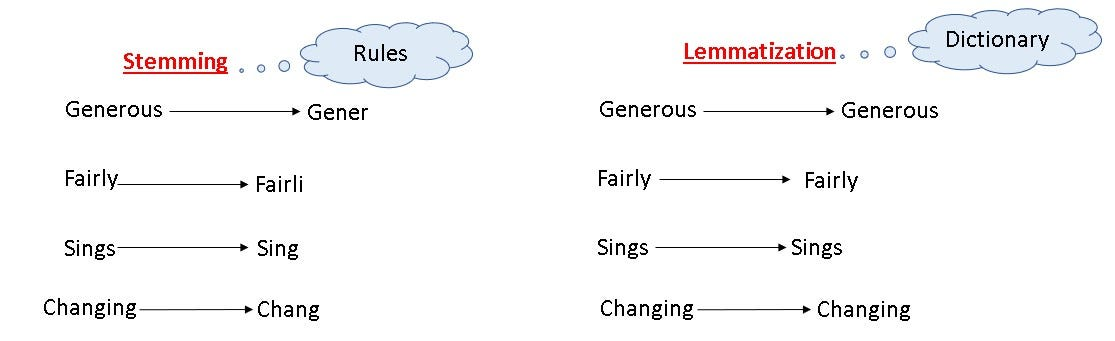

Since the goal of this project to create a sentiment analysis, we will be using Lemmatization because:
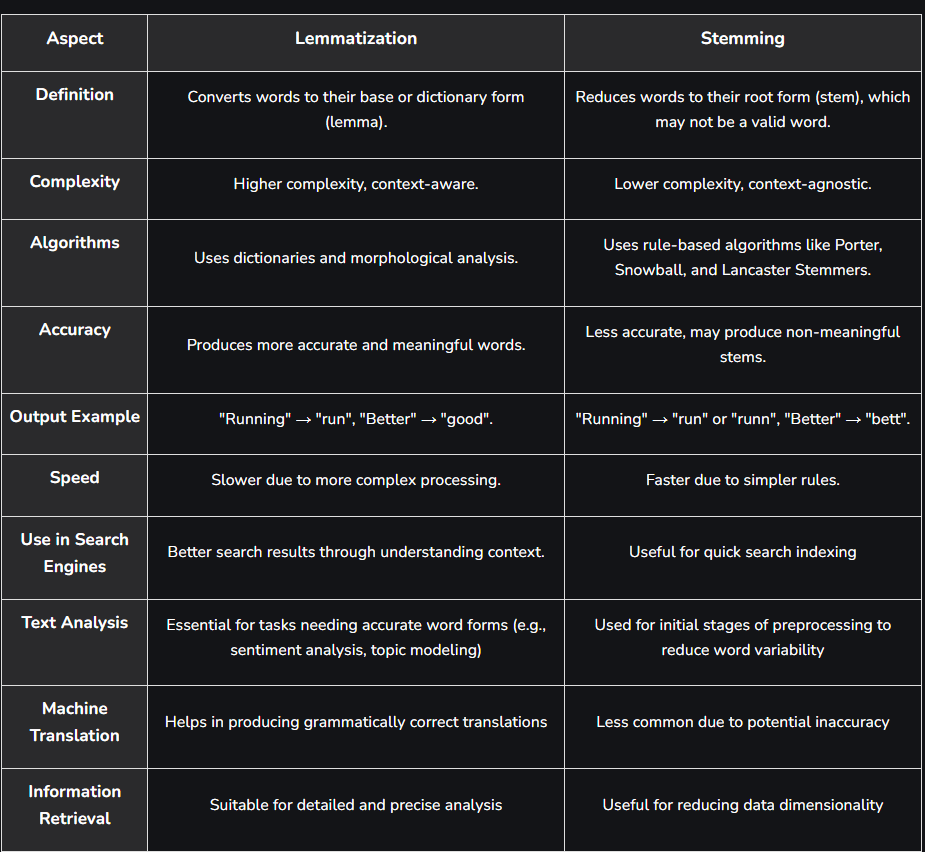

https://www.pythonhelp.org/tutorials/how-to-lemmatize-python/

In [30]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatize_words = [lemmatizer.lemmatize(x) for x in text]
    # join_lemmatized = ' '.join(lemmatize_words)
    return lemmatize_words

X_lem = X_train.apply(lemmatize_text)
print(X_lem)

192    [check, !, explanation, directorate, general, ...
234    [vat, becomes, 11, %, price, samsung, xiaomi, ...
5      [vat, increased, 12, %, government, provide, s...
45     [vat, increase, 12, %, entrepreneur, could, ba...
245    [get, ready, !, telkomsel, xl, indosat, smartf...
                             ...                        
71     [included, prabowo, 's, apbn, posture, vat, in...
106    [series, criterion, building, house, taxable, ...
270    [vat, rate, increase, 11, %, starting, april, ...
348    [fate, hanging, vat, increase, msme, entrepren...
102    [revealed, !, culprit, behind, expensive, plan...
Name: title_en, Length: 331, dtype: object


#### 8. Training

#### 9. Cross Validation

#### 10. Evaluation